# Zarządzanie kluczami kryptograficznymi


Jakub Augustyn, Arkadiusz Ryba
Cyberbezpieczeństwo

## Agenda

1. Na czym polega bezpieczeństwo kryptografii?
2. Techniki zarządzania kluczami w kryptografii symetrycznej
3. Dystrybucja klucza w kryptografii asymetrycznej
4. Protokół Diffie-Hellmana oraz Station to station
5. Zastosowanie praktyczne

### 1. Na czym polega bezpieczeństwo kryptografii?

W myśl zasady kerckhoffsa:

>Bezpieczeństwo szyfru nie może opierać się na nieznajomości metody szyfrowania

Oznacza to że nawet jeśli osoba z zewnątrz pozna sposób szyfrowania oraz wszystkie szczegóły dotyczące działania algorytmu poza samym kluczem, szyfrogram wciąż pozostaje bezpieczny. Inaczej mówiąc, bezpieczeństwo polega na jednym składniku - kluczu. 

W przypadku szyfru idealnego - matematycznie udowodnionego za nie do złamania, najsłabszym ogniwem nie są same klucze - tylko ich bezpieczna dystrybucja bez udziału osób niepostronnych

W związku z tym, aby komunikacja była szyfrowana i tym samym bezpieczna, należy znaleźć sposób bezpiecznej dystrybucji klucza szyfrującego komunikację. 

Wymiana lub ustalanie kluczy kryptograficznych w sposób bezpieczny jest koniecznością w przypadku stosowania szyfrów symetrycznych.


**Jak zatem dostarczać klucz?**
1. Fizyczne dostarczenie do drugiej strony - tak zwane *point-to-point*
2. Pośrednik w postaci zaufana organizacji (np. KDC - Centrum Dystrybucji klucza) - generuje klucze i dostarcza odpowiednio dla każdej ze stron
3. Poprzez przesłanie zaszyfrowanego klucza przy pomocy innego klucza (np. wykorzystywanego w poprzedniej sesji)
 - nawet jawnym łączem
 
 Wszystkie powyższe metody mają jednocześnie słabe i mocne strony, dlatego są stosowane w różnych sytuacjach
 
Pierwsza opcja z listy wydaje się być na pierwszy rzut oka dobrym pomysłem, jednak gdy dochodzi do komunikacji więcej niż dwóch osób, problem rośnie bardzo szybko - jest *nieskalowalny*. Każda para osób wymaga oddzielnego klucza, aby szyfrogram był niezrozumiały dla osób z zewnątrz (*end-to-end encryption* - tylko autor i odbiorca mogą widzieć wiadomośc w wersji jawnej). W związku z tym dla *n* liczby osób ilość potrzebnych kluczy rośnie kwadratowo. Sposób przeznaczony tylko w sytuacjach, które wymagają szczególnej poufności, jak i samego faktu zatajenia komunikacji. 

Opcja trzecia także nie jest pozbawiona wad. Zauważmy, że w przypadku ataku typu *man in the middle* intruz będzie znał nie tylko obecną wiadomość, lecz także wszytkie przyszłe, zakładając, że znany jest sposób generowania klucza . Ponadto wciąż problemem jest, jak dostarczyć ten pierwszy inicjilizujący komunikację? Również istnieją także rozwiązania - a ich plusem z pewnością jest małe zużycie dostępnych zasobów.

W związku z tym, dla większej ilości osób można zastosujować się opcję nr **2**, lub jej pochodne kombinacje.
Centrum dystrybucji klucza jest to jednostka odpowiedzialna za odpowiednie wybranie i rozsyłanie kluczy sesji do wszystkich użytkowników o to proszących.Takie centrum przechowuje wtedy tyle kluczy, ile jest użytkowników
Dzięki takiemu rozwiązaniu problem ilości potrzebnych kluczy maleje (w porównaniu z opcją nr. 1) a samą dystrybucją zajmuje się centrum, a nie użytkownik.

Do tego KDC wykorzystywane jest do połączeń między dwoma użytkownikami jako generator tymczasowego klucza sesji.
CDK wchodzi w skład tak zwanej jej publicznej infrastruktury klucza - jednostki odpowiedzialnej również za uwierzytelnianie użytkowników, które może być przydatne w zwiększeniu zaufania do jednostki przekazującej klucz

Inaczej mówiąc, jest to abstrakcyjny model urządzeń, aplikacji, polityki, użytkowników
oraz procedur mający na celu tworzenie, przechowywanie, zarządzanie i
rozprowadzanie cyfrowych certyfikatów klucza publicznego. Cała infrastruktura tworzy bezpieczną i
zaufaną strukturę, której kluczowym elementem jest certyfikat.
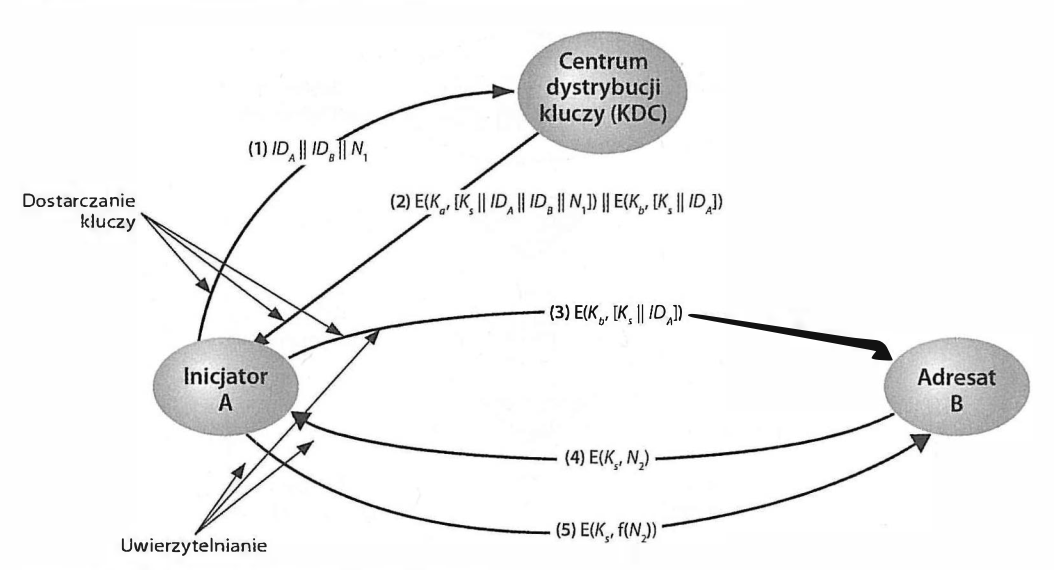


### 2. Techniki zarządzania kluczami w kryptografii symetrycznej

Jedną ze słabości słabością kryptografii klucza asymetrycznego jest fakt, że musimy wysłać ten klucz jawnym łączem i trzymać kciuki, żeby nikt go nie odtworzył -  z pomocą przychodzi matematyka. We wszystkich kryptosystemach uzyskanie klucza prywatnego na podstawie publicznego musi być obliczeniowo trudne. 

Asymetria algorytmu szyfrującego ma nie gwarantować bezpieczeństwa teoretycznego, tylko praktyczne - mianowicie, że faktoryzacja klucza ma trwać tak długo, że będzie niepraktyczna (szyfr zostanie złamany, kiedy informacja będzie już nieważna).

### Algorytm Shamira

In [8]:
# ALGORYTM SHAMIRA

from Crypto.Util.number import getPrime, GCD
import random

low_range, up_range = 128, 128

# p = getPrime(random.randint(low_range, up_range))                   # jawna
p = getPrime(128)

# Ustalanie liczb a i b -> tajnych
a = p-1
while(GCD(a, p-1) > 1):
    a = random.randint(2, p-1)
a_rev = pow(a, -1, p-1)    


b = p-1
while(GCD(b, p-1) > 1 and a != b):
    b = random.randint(2, p-1)
b_rev = pow(b, -1, p-1)

print(f"p = {p}\na = {a}, rev = {a_rev}\nb = {b}, rev = {b_rev}\n")

# Główny mechanizm działania
K = random.randint(2, p)
K_a = pow(K, a, p)              # A wysyla do B liczbe K^a
K_a_b = pow(K_a, b, p)          # B wysyla do A liczbe K^(a*b)
K_b = pow(K_a_b, a_rev, p)      # A liczy klucz i odsyla do B
Key_B = pow(K_b, b_rev, p)      # B liczy klucz

print(f"Klucz sesji:             {K}\nKlucz wyliczony przez B: {Key_B}")

ModuleNotFoundError: No module named 'Crypto'

### Kwintesencja geometrii w zastosowaniach kryptograficznych - krzywe eliptyczne
Co to jest krzywa eliptyczna?

Równanie przedstawia sie wzorem:

$y^2 = x^3 + ax + b $

gdzie *a, b* są ustalonymi parametrami.

W kryptografii najczęściej bierze się pod uwagę krzywe rozpięte nad ciałami $ \mathbb{Z}_p $, tzn. wszystkie wartości bierzemy $ mod p $.

Punkty należące do krzywej eliptycznej są **grupą**, o ile krzywa spełnia $ \Delta = 4a^3+27b^2 \ne 0 $ (oczywiście *mod p* ).

**Dodawanie** punktów krzywej eliptycznej nie wygląda jak zwykłe, znane nam z działań na liczbach rzeczywistych.
Jak zatem dodawać punkty?

Niech $ P_1 = (x_1, y_1), P_2 = (x_2, y_2), P_3 = P_1 + P_2.

Algebraiczna interpretacja:
Jeśli $ x_1 = x_2 $, ale $ y_1 \ne y_2 $, to $$ P_3 = (\infty; \infty) $$
Jeśli $ x_1 = x_2 $, oraz $ y_1 = y_2 $, czyli $ P_1 = P_2 $, to obliczamy według wzoru: $$ x_3 = (\frac{3x_1^2+a}{2y_1})^2 - 2x_1$$
$$ y_3 = -y_1 + (\frac{3x_1^2+a}{2y_1})(x_1 - x_3) $$
W pozostałych przypadkach obowiązuje: $$ x_3 = (\frac{y_2-y_1}{x_2-x_1})^2-x_1-x_2 $$
$$ y_3 = -y_1 +(\frac{y_2-y_1}{x_2-x_1})(x_1-x_3) $$

Potrzebujemy także zdefiniować **logarytm dyskretny**.
Mówimy, że $k$ jest *logarytmem dyskretnym* z $Q$ o podstawie $P$, jeśli *$k\cdot P=Q$*

Problem liczenia logarytmu dyskretnego rośnie bardzo szybko wraz ze wzrostem używanych danych. Dla normalnej grupy z mnożeniem jest to złożoność rzędu $ 2^{O(\sqrt[3]{\ln{p}\ln{\ln^2{p}}})} $, natomiast dla grupy z elementami krzywej eliptycznej rozpiętej nad $ \mathbb{Z}_p $ złożoność ta wynosi $ 2^{O(\log{p})}$, zatem jest znacznie większa

**Tabelka z przykładami dla dużych liczb**





In [3]:
# DIFFIE - HELLMAN NA KRZYWYCH ELIPTYCZNYCH
# Czasem nie działa, rng musi być dobre, odbuguje kiedyś
# Na razie statycznie, spróbuje na randintach w wolnym czasie

from math import inf
import random

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f'({self.x}, {self.y})'

def sum_points(P: Point, Q: Point, a, b, m) -> Point:
    R = Point(0, 0)
    
    if(P.x == Q.x and P.y == Q.y):
        s = ((3*(P.x**2) + a) * pow(2*P.y, -1, m))
        s %= m
        R.x = s**2 - 2*P.x
        R.y = (-1)*(P.y + s*(R.x - P.x))
        
    elif(P.x != Q.x):
        s = (Q.y - P.y) * pow((Q.x - P.x), -1, m)
        s %= m
        R.x = s**2 - P.x - Q.x
        R.y = (-1)*P.y + s*(P.x - R.x)
        
    elif(P.x == Q.x):
        R.x, R.y = inf, inf
        
    R.x %= m
    R.y %= m
    return R

def multiply_point(P: Point, k, a, b, m) -> Point:
    R = P
    i = 1
    while(i < k):
        R = sum_points(R, P, a, b, m)
        i += 1
    return R
    

# Wybieranie początkowych parametrów
# y^2 = x^3 + ax + b    mod m
a, b, m = 9, 17, 23
G = Point(16, 5)                    # musi należeć do krzywej

d_A = random.randint(1, m-1)        # Klucze prywatne, tajne
d_B = random.randint(1, m-1)

G_A = multiply_point(G, d_A, a, b, m)        # Klucze publiczne, jawne
G_B = multiply_point(G, d_B, a, b, m)

Key_A = multiply_point(G_B, d_A, a, b, m)    # Wyliczanie umówionego klucza
Key_B = multiply_point(G_A, d_B, a, b, m)

print("Klucz wyliczony przez Alicje: ", Key_A, "\nKlucz wyliczony przez Boba: ", Key_B) 


Klucz wyliczony przez Alicje:  (14, 9) 
Klucz wyliczony przez Boba:  (14, 9)


Tutaj jakaś teoria o Diffiem i jego słabości
**Jak zatem chronić się przez atakiem man-in-the-middle?**

## Techniki zarządzania kluczami w kryptografii asymetrycznej

### Hybrydowy schemat dystrybucji kluczy - Protokół Station-to-Station (STS)

Wyłoniony w 1987 w ramach konkursu *ISDN security* algorytm w głównej mierze bazuje na algorytmie Diffiego-Hellmana jednakże rozszerza go o możliwość uwierzytelniania użytkowników - tym samym zwiększając wiarygodność stron w ustalaniu klucza

#### Schemat działania

1. Alice (czyli osoba rozpoczynająca komunikację) generuje losową wartość $N_1$ podpisuje ją kluczem publicznym Boba i zaszyfrowaną wartość przesyła kanałem komunikacji do Boba.
2. Otrzymaną wiadomość Bob rozszyfrowuje swoim kluczem prywatnym, generuje swoją losową wartość $N_2$ a następnie przesyła do Alice zaszyfrowaną jej kluczem prywantym wiadomość zawierająca otrzymaną wartość $N_1$ i swoją $N_2$
3. Alice otrzymuje zaszyfrowaną wiadomość od Boba i odszyfrowuje ją za pomocą klucza publicznego Boba. Wiadomość zawiera wartość $N_1$ dzięki której Alice ma pewność, że nadawcą faktycznie jest Bob. Nastepnie Alice szyfruje otrzymaną wartość $N_2$ kluczem publicznym Boba a następnie ją przesyła.
4. Alice na podstawie dostępnych wartości $N_1$ i $N_2$ generuje klucz sesji $K_s$ i wysyła go za pomocą szyfrowania asymetrycznego kluczem publicznym Boba
5. Bob otrzymuję wiadomość, odszyfrowuję ją swoim kluczem prywatnym i na podstawie dostępnych wartości $N_1$ i $N_2$ generuje klucz sesji $K_s$
W tym momencie może nastąpić komunikacją za pomocą nowo ustalonego klucza


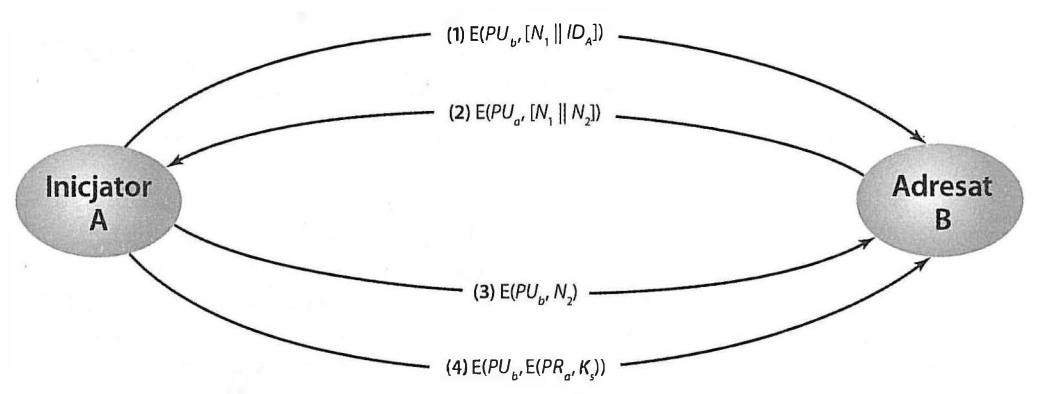


Dzięki powyższemu schematowi uniemożliwiony jest atak typu *man in the middle*

W praktyce stosuje się go w protokole SSL/TLS - jednakże nie bezpośrednio. Najpierw uwierzytelnia się podmiot (klienta lub serwer) za pomocą certyfikatu, a następnie następuje ustalanie klucza za pomocą algorytmu Diffiego-Hellmana.

Rozwinięciem powyższego protokołu oraz nieco innym rozwiązaniem opartym na połączeniu kryptografii symetrycznej i asymetrycznej do dystrybucji kluczy jest rozwiązanie wykorzystywane w systemach IBM *mainframe*
Centrum dystrybucji klucza dostarcza użytkownikom odpowiednie klucze sesji zaszyfrowane przy pomocy kluczy nadrzędnych - stworzonych za pomocą kryptografii asymetrycznej. Dzięki takiemu rozwiązaniu możliwe jest częste zmienianie kluczy sesji, zachowana jest wydajność (sama komunikacja odbywa się za pomocą szyfrowania kluczem symetrycznym), wielka skalowalność, również możliwa jest kompatybilność z wieloma kryptosystemami

### Protokół Kerberos 